# Tiny Twitter tutorial

by [@barbara_plank](http://www.twitter.com/barbara_plank)

In this notebook you will see how you can access Twitter using the Twitter's API. 

**Further literature** An excellent (and more detailed) introduction to the Twitter API is the ultimate [Twitter tutorial by Wei Xu](http://socialmedia-class.org/twittertutorial.html), which this material is largely based on. Thanks, Wei!

## Twitter's API

An API is an *application programming interface*, a set of functions in some programming language that allow you to access functionality of some system. 



## Getting access credentials

Before you can make any request to the Twitter API, you need to get access credentials. The first step is to create a Twitter account (unless you already have one) and then create an application on [http://dev.twitter.com/apps](http://dev.twitter.com/apps)

1. Log in to [http://dev.twitter.com/apps](http://dev.twitter.com/apps) and press 'Create New App'. 
2. Enter the required information (name, description, website) and create your Twitter application.
3. Go to 'Key and Access Tokens' and 'Create my access token'.
4. Copy your "API key", "API secret" and "Access token" and "Access token secret".

Now you have your credentials. We will store them in a JSON file that we will later give to our script. Copy your credentials to a file called `credentials-YOURNAME.json`:

In [ ]:
{
 "CONSUMER_KEY": "INSERT_HERE",
 "CONSUMER_SECRET": "INSERT_HERE",
 "ACCESS_TOKEN": "INSERT_HERE",
 "ACCESS_TOKEN_SECRET": "INSERT_HERE",
}

## Installing the Python Twitter tools

There are many python Twitter libraries around, we will use the [Python Twitter tools](https://pypi.python.org/pypi/twitter). 

Download and install Anaconda python 3.5 from https://www.continuum.io/downloads
After installing Anaconda python, start python and check that it says Anaconda (see example below):

```
% python
Python 3.5.2 |Anaconda 2.5.0 (64-bit)| (default, Jul  2 2016, 17:53:06)
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>>

```

Then, install the Twitter package:
```
% pip install twitter
Collecting twitter
  Downloading twitter-1.17.1-py2.py3-none-any.whl (55kB)
      100% |████████████████████████████████| 61kB 3.1MB/s
Installing collected packages: twitter
Successfully installed twitter-1.17.1
```

To check if it worked:
```
% python
% >>> import twitter
```
(If you don’t get any error message, your installation was successful!)

Now we are all set to get data from Twitter!


## Connecting to the Twitter API

Twitter has two main APIs, the REST and Streaming API (see the [Twitter documentation](https://dev.twitter.com/overview/documentation) for more details). 

* The Streaming API gives you access to a *sample* of **real-time** tweets.
* For anything that goes beyond a random sample, you'll use the REST API (e.g. searching for tweets that contain a specific search term). 

Typically we use the REST API, but the difference does not really matter much for us here.

Let us get some data by connecting to the streaming API to get a real-time sample of tweets. 

### Get a sample of tweets from the Streaming API

Copy the following code and save it as `twittersample.py` file. 

In [ ]:
#!/usr/bin/env python3
# Getting a sample of tweets
# __author__: bplank
import argparse
import json
from twitter import OAuth, TwitterStream

parser = argparse.ArgumentParser("Example: Accessing the Twitter Streaming API")
parser.add_argument('--credentials','-c', help="user credentials (required)",required=True)
parser.add_argument('--count', help="number of tweets", default=10)

args = parser.parse_args()

## Load your credentials
credentials = json.load(open(args.credentials))

CONSUMER_KEY=credentials["CONSUMER_KEY"]
CONSUMER_SECRET=credentials["CONSUMER_SECRET"]
ACCESS_TOKEN=credentials["ACCESS_TOKEN"]
ACCESS_TOKEN_SECRET=credentials["ACCESS_TOKEN_SECRET"]

my_authentication = OAuth(ACCESS_TOKEN, ACCESS_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

# Init the connection to the Twitter Streaming API
twitter_stream = TwitterStream(auth=my_authentication)

# Get a sample from the Twitter Streaming API (it's an endless loop)
iterator = twitter_stream.statuses.sample()

i=0
for tweet in iterator:
    if i > args.count:
        break
    if "text" in tweet:
        text = tweet["text"]
        date = tweet["created_at"]
        print(text, date)
    i+=1

Now execute the script as follows, providing your credentials as argument: 

```
python twittersample.py --credentials YOURFILE
```

Inside this Jupyter Notebook we can run the script (assuming it is stored in the same location as this notebook) by typing:

In [39]:
%run twittersample.py --credentials private/credentials-barbara.json

#НаррилумСосётВИнсту
https://t.co/wAVUTC2YkP
пролайкаю вам фотки Sun Oct 02 14:54:14 +0000 2016
jsuis censée faire mon commentaire de merde mais je parle religion avec Ryad mdrrr 
et c'est bien plus intéressant que jack london Sun Oct 02 14:54:14 +0000 2016
RT @D_pukpui: ความอร่อยที่ลงตัวของน้ำผึ้งและมะนาวจนต้องหอบหิ้วมาฝากคนที่บ้าน #MilkOnTheRockBKK https://t.co/QOXUIoQb8H Sun Oct 02 14:54:14 +0000 2016
Querer querernos 🎵 Sun Oct 02 14:54:14 +0000 2016
RT @mokkoriJAPAN: 人間&lt;ゴリラ&lt;霊長類最強 https://t.co/WN0V21LdhF Sun Oct 02 14:54:14 +0000 2016
このトラック数である https://t.co/3be8LgIX7b Sun Oct 02 14:54:13 +0000 2016
Bagaimana kabarmu disana adekku...
Semoga kamu dn seluruh keluarga disana terutama ayah dn ibu… https://t.co/UircUTgzqx Sun Oct 02 14:54:14 +0000 2016
2017 will be GREAT Sun Oct 02 14:54:14 +0000 2016
@bloom_ej 흑흑.... 바서비.... ㅠㅠ 머싯따... Sun Oct 02 14:54:14 +0000 2016
RT @partyhike: 『女子は清潔感のあるおっさんなら好き』とツイートしたら、フォロワーから『清潔感のあるおっさんが好き』というのは『カレー味のウンコなら食べられる』というのと同じぐらい狂った言説であり、それは『おっさんが絶望

## A single tweet

In the example above, we extracted two pieces of information: the text and the creation data of the tweet. However, there is much more information contained in a single tweet. 

<img src="https://cdn-images-1.medium.com/max/1600/1*HHq5BFKMTV5TArxo6mqu_w.jpeg">

The Twitter API returns data in [JSON](http://www.w3schools.com/js/js_json_intro.asp) format, and a single tweet contains *a lot of meta-data*.

For example, the following tweet:

<img src="pics/tweet.png" width=600>

is represented in JSON as:


In [40]:
tweet = {'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'in_reply_to_user_id_str': None, 'favorited': False, 'possibly_sensitive': False, 'in_reply_to_status_id': None, 'user': {'listed_count': 16, 'profile_link_color': '0084B4', 'profile_text_color': '333333', 'description': '', 'profile_background_tile': False, 'follow_request_sent': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/605391347437043712/CFz1Qh3Y_normal.jpg', 'contributors_enabled': False, 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'url': 'https://t.co/VGUuVzPsq4', 'lang': 'en', 'id_str': '3232640646', 'profile_sidebar_border_color': 'C0DEED', 'friends_count': 183, 'time_zone': None, 'id': 3232640646, 'verified': False, 'created_at': 'Mon Jun 01 15:10:28 +0000 2015', 'profile_sidebar_fill_color': 'DDEEF6', 'has_extended_profile': False, 'geo_enabled': False, 'default_profile_image': False, 'profile_background_color': 'C0DEED', 'utc_offset': None, 'protected': False, 'name': 'Barbara Plank', 'followers_count': 311, 'is_translator': False, 'location': '', 'notifications': False, 'default_profile': True, 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/3232640646/1451321777', 'is_translation_enabled': False, 'profile_use_background_image': True, 'entities': {'description': {'urls': []}, 'url': {'urls': [{'indices': [0, 23], 'url': 'https://t.co/VGUuVzPsq4', 'expanded_url': 'http://www.let.rug.nl/bplank', 'display_url': 'let.rug.nl/bplank'}]}}, 'following': False, 'statuses_count': 332, 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/605391347437043712/CFz1Qh3Y_normal.jpg', 'favourites_count': 401, 'screen_name': 'barbara_plank'}, 'created_at': 'Sun Sep 25 17:33:32 +0000 2016', 'lang': 'en', 'retweet_count': 26, 'coordinates': None, 'truncated': False, 'entities': {'user_mentions': [], 'urls': [{'indices': [45, 68], 'url': 'https://t.co/KufGegGnmn', 'expanded_url': 'http://coling2016.anlp.jp/', 'display_url': 'coling2016.anlp.jp'}], 'hashtags': [{'indices': [31, 42], 'text': 'coling2016'}, {'indices': [69, 76], 'text': 'NLProc'}], 'symbols': []}, 'in_reply_to_user_id': None, 'metadata': {'result_type': 'recent', 'iso_language_code': 'en'}, 'favorite_count': 12, 'id': 780097921249411076, 'in_reply_to_status_id_str': None, 'contributors': None, 'in_reply_to_screen_name': None, 'is_quote_status': False, 'retweeted': False, 'text': 'Accepted COLING papers are out #coling2016 - https://t.co/KufGegGnmn #NLProc', 'place': None, 'id_str': '780097921249411076', 'geo': None}

Well, we don't see much of the information, let us use the pretty-print function to examine the content of the tweet's JSON format:

In [41]:
# let us use pretty print function
print(json.dumps(tweet, indent=4))

{
    "in_reply_to_status_id": null,
    "entities": {
        "hashtags": [
            {
                "indices": [
                    31,
                    42
                ],
                "text": "coling2016"
            },
            {
                "indices": [
                    69,
                    76
                ],
                "text": "NLProc"
            }
        ],
        "symbols": [],
        "user_mentions": [],
        "urls": [
            {
                "expanded_url": "http://coling2016.anlp.jp/",
                "indices": [
                    45,
                    68
                ],
                "url": "https://t.co/KufGegGnmn",
                "display_url": "coling2016.anlp.jp"
            }
        ]
    },
    "geo": null,
    "id": 780097921249411076,
    "created_at": "Sun Sep 25 17:33:32 +0000 2016",
    "is_quote_status": false,
    "coordinates": null,
    "id_str": "780097921249411076",
    "favorited": false,
    "co

There is a lot of additional metadata in a single tweet!

The following map by Raffi Krikorian (taken from Wei Xu's social media class) explains the content of a tweet:

<img src="http://socialmedia-class.org/assets/img/raffi-krikorian-map-of-a-tweet.png">

### Language identification (LangID)

In the streaming sample we encountered tweets in many different languages.

#### Language distribution on Twitter 
<img src="pics/langdistribution.png" width=700> (Verhoeven, Plank, Daelemans, 2016)

Note that each tweet contains a `lang` attribute, as also shown in Krikorian's map. 
However, this attribute is actually **outdated**. 

Since 2013 Twitter uses automatic language identification, and `lang` now contains the predicted language. The attribute can also contain `und` (for undefined). For more information:

* [Twitter: Introduction new metadata, 2013](https://blog.twitter.com/2013/introducing-new-metadata-for-tweets)
* [Evaluating Language Identification performance, 2015](https://blog.twitter.com/2015/evaluating-language-identification-performance)

For our example tweet:

In [42]:
tweet['lang']

'en'

### A language identification toolkit

A easy-to-use language idenficiation toolkit has been implmented in `langid` [Lui and Baldwin, 2012](www.aclweb.org/anthology/P12-3005). It covers approximately 100 languages. You can install it with `pip install langid`. 

It's based on the Naive Bayes algorithm. And it's easy to use:

In [9]:
import langid
langid.classify("this is a sample test. Which language, what's your guess?")

('en', -119.58683443069458)

In [11]:
langid.classify("en nu is het?")

('nl', -21.903905391693115)

In [12]:
langid.classify("des isch iatz ober schwieriger..")

('de', -81.0643835067749)

### Searching tweets by query term

Typically we would like to search for tweets that contain a particular **search term**. This is simple with the Twitter Python tools, as the following code snippet shows.

In [8]:
import twitter
import json
from twitter import Twitter, OAuth, TwitterStream

cred = json.load(open("private/credentials-barbara.json"))
# Initiate the connection to Twitter REST API

my_authentication = OAuth(cred["ACCESS_TOKEN"], cred["ACCESS_TOKEN_SECRET"], \
                          cred["CONSUMER_KEY"], cred["CONSUMER_SECRET"])

twitter = Twitter(auth=my_authentication)

# Search for latest tweets about Groningen
query =  twitter.search.tweets(q='Groningen',count=10)
for tweet in query["statuses"]:
    print(tweet['text'])

Vanmiddag #trainee #intervisie met als thema #omdenken #trainees @gem_groningen en @Gemeente_Assen
Melding : p 5 oefening brand gebouw nb:middel br 01-18-650 gasunie concourslaan 17 groningen 011832 https://t.co/oB09UKLP2g
Melding : p 5 oefening brand gebouw 01-18-650 gasunie concourslaan groningen 011833 011851 https://t.co/bWcrxQBXJW
Keynote lecture de @jpujolar al congrés @PuzzlingEurope a Rijksuniversiteit Groningen https://t.co/z4NcqbPQKk …
@UOCartshum @COSTNewSpeakers
P 5 Oefening Brand Gebouw (NB:Middel Br) 01-18-650 Gasunie Concourslaan 17 Groningen 011832~
P 5 Oefening Brand Gebouw 01-18-650 Gasunie Concourslaan 17 Groningen 011833 011851~
Als burger je recht halen in Groningen: informatie van de hoogleraren

Zowel de boerderij van Annemarie Heite als... https://t.co/0ffQIYlanb
27-10 13:44: P 5 Oefening Brand Gebouw (NB:Middel Br) 01-18-650 Gasunie Concourslaan 17 Groningen 011832 https://t.co/xBDI85xieY
Er is een Belgisch akkoord over CETA https://t.co/Cx1c19qkFV
13:44:39|Gro

Now we fetch the last tweet and examine who posted it:

In [9]:
tweet = query['statuses'][-1]
print(tweet['user']['name'],tweet['user']['created_at'])

P2000NN® Wed Sep 18 10:51:55 +0000 2013


### Extra 1: Getting the tweets of a specific user

In [10]:
# Get a particular user's timeline (up to 3,200 of his/her most recent tweets)
data = twitter.statuses.user_timeline(screen_name="barbara_plank",count=2)
data

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Wed Oct 26 16:55:53 +0000 2016',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 214062910,
     'id_str': '214062910',
     'indices': [0, 9],
     'name': 'Sara Tonelli',
     'screen_name': 'sara_hlt'}]},
  'favorite_count': 1,
  'favorited': False,
  'geo': None,
  'id': 791322468426317826,
  'id_str': '791322468426317826',
  'in_reply_to_screen_name': 'sara_hlt',
  'in_reply_to_status_id': 791179136148570112,
  'in_reply_to_status_id_str': '791179136148570112',
  'in_reply_to_user_id': 214062910,
  'in_reply_to_user_id_str': '214062910',
  'is_quote_status': False,
  'lang': 'en',
  'place': None,
  'retweet_count': 0,
  'retweeted': False,
  'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
  'text': '@sara_hlt have to, really! hopefully soon.. maybe January?! lets keep in touch!',
  'truncated': False,
  'user': {'contributors_enabled': False,

Note that even if you specify `count` as more than 200, the Twitter API is limited to retrieve only up to the 200 most recent tweets. See: [https://dev.twitter.com/rest/reference/get/statuses/user_timeline]

## *UPDATE*: Getting the tweets of a user (>200!)

The standard Twitter API we used above is limited, it retrieves only up to 200 tweets per user. In order to retrieve more (up to roughly 3000 tweets), we have to resort to another library, namely `TwitterSearch` [https://twittersearch.readthedocs.io/].

We install `TwitterSearch` with pip:

`pip install TwitterSearch`

In [16]:
import json
from TwitterSearch import TwitterUserOrder, TwitterSearch

cred = json.load(open("private/credentials-barbara.json"))
my_authentication = OAuth(cred["ACCESS_TOKEN"], cred["ACCESS_TOKEN_SECRET"], \
                          cred["CONSUMER_KEY"], cred["CONSUMER_SECRET"])

ts = TwitterSearch(access_token=cred["ACCESS_TOKEN"],access_token_secret=cred["ACCESS_TOKEN_SECRET"],
                       consumer_key=cred["CONSUMER_KEY"], consumer_secret=cred["CONSUMER_SECRET"])

username="barbara_plank"
twitter_user_order = TwitterUserOrder(username)

all_tweets = []
for tweet in ts.search_tweets_iterable(twitter_user_order):
    all_tweets.append(tweet)

print("Show 10 tweets:")
for tweet in all_tweets[0:10]:
    print(tweet['text'])

print("")
print("total: {}".format(len(all_tweets)))

Show 10 tweets:
@sara_hlt have to, really! hopefully soon.. maybe January?! lets keep in touch!
@drmarkstevenson @SheffieldNLP it was my pleasure! I very much enjoyed :) boarding now, see you all soon again!
I'm currently visiting @SheffieldNLP -- giving a talk tomorrow at 12h -- swing by :)
@LeonDerczynski true!
RT @SebastienBubeck: Already 8000 registered for NIPS 2016, it's insane...
@LeonDerczynski so now it's back it seems? for you, too?
RT @peoples2016: #peoples2016 list of accepted papers online: https://t.co/9e0j4gm9VC - Congrats to all authors! #coling2016  #NLProc
RT @zehavoc: Giving a talk in Paris has its virtues :) @barbara_plank @H_ctorMart_nez loved it! https://t.co/ULeSyFmHPa
Groningen, that's another +2h  [no fast connection, unfortunately, they debated for decades..]
btw: the Thalys connection from Amsterdam to Paris is fantastic (~3h and your are in the middle of the city) -- flying'd be a waste of time

total: 352


### Extra 2: Plotting my last 100 tweets (by month_year)

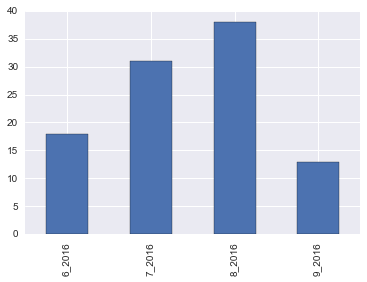

In [5]:
%matplotlib inline 
from twitter import Twitter
import pandas as pd
import numpy as np
import seaborn as sb #optional: for prettier plotting
from collections import Counter
from dateutil.parser import parse

my_tweets = twitter.statuses.user_timeline(screen_name="barbara_plank",count=100)
times = [parse(tweet['created_at']) for tweet in my_tweets]
month_year = ["{}_{}".format(t.month, t.year) for t in times]
timeseries = pd.Series(Counter(month_year))
timeseries.plot(kind='bar')

## Exercises:

1. Search for tweets that contain the hashtag "#NLProc".
2. Modify `twittersample.py` so that it returns entire JSON object. Save the output of the script in a file.
3. Examine the language identification attribute of a sample of 50 tweets. Compare it to `langid`'s language guesser.


# References

* [Wei Xu's ultimate Twitter tutorial](http://socialmedia-class.org/twittertutorial.html)
* Matthew A. Russel *Mining the Social Web*. O'Reilly, 2014.
* Mitja Trampus, [Evaluating language identification performance](https://blog.twitter.com/2015/evaluating-language-identification-performance). Twitter blog, 2015.
* Lui & Baldwin. [langid.py: An Off-the-shelf Language Identification Tool](http://www.aclweb.org/anthology/P12-3005) In ACL, 2012.